In [80]:
import pandas as pd
from datetime import datetime   # 패키지 - 모듈 (이름 같음)
import pandas as pd   # csv file read
import matplotlib.pyplot as plt   # 시계열 시각화
from sklearn.preprocessing import LabelEncoder # 인코딩
import numpy as np
import statsmodels.api as sm
pd.options.display.float_format = '{:.5f}'.format
import datetime
plt.rcParams['font.family'] ='Malgun Gothic'

plt.rcParams['axes.unicode_minus'] =False
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")
import os
plt.style.use('ggplot')


In [3]:
!pip install plotly==5.4.0

In [4]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls')

In [5]:
#df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
# df['공고게시일자'] = df['공고게시일자'].astype(str)

# df['공고게시일자'] = pd.to_datetime(df['공고게시일자'])

# df['입찰계약방법축소'] = df.입찰계약방법.str.split('(').str[0]

#df['week']=df['공고게시일자'].dt.week

#df['Month'] = df['공고게시일자'].dt.month
#df['YEAR'] = df['공고게시일자'].dt.year 

In [7]:
#df.dtypes

In [8]:
df.to_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index = False)

In [9]:
df = pd.read_csv('C:/Users/yjhon/OneDrive/바탕 화면/조달청_공모전/Regression_timeseries/물품용역공사_2017_2021.xls',index_col="공고게시일자")

In [129]:
df['추정가격'].astype(str).astype(float)
pd.to_numeric(df.추정가격,errors='coerce').fillna(0)
df['추정가격'].astype('int64', errors='ignore')
df.dtypes

등록유형         object
조달구분         object
입찰공고차수        int64
수요기관명        object
수요기관코드       object
긴급공고여부       object
정정공고여부       object
취소공고여부       object
추정가격        float64
입찰방식         object
낙찰자결정방법      object
입찰계약방법       object
예가방법         object
업종제한내용       object
지역제한내용       object
대상           object
입찰계약방법축소     object
dtype: object

In [130]:
water_cmp =df[df.수요기관명 == "한국수자원공사"]
water_cmp.대상.value_counts()

용역    5536
물품    4222
공사    3608
Name: 대상, dtype: int64

In [131]:
test_df =df[df.수요기관명 == "방위사업청"]
test_df.대상.value_counts()

물품    31313
공사    16015
용역    15140
Name: 대상, dtype: int64

In [132]:
water_cmp_service = water_cmp[water_cmp.대상=="용역"]
water_cmp_service.추정가격.value_counts()
#water_cmp_service
#test_df_item = test_df[test_df.대상=="물품"]
#test_df_item.추정가격.value_counts()

0.00000             198
95000000.00000       20
80000000.00000       17
40000000.00000       16
150000000.00000      16
                   ... 
180523000.00000       1
164450000.00000       1
495473000.00000       1
2767500000.00000      1
168500000.00000       1
Name: 추정가격, Length: 3704, dtype: int64

In [133]:
col_n = ['추정가격']

indexNames = water_cmp_service[ water_cmp_service['추정가격'] == 0.00000 ].index
water_cmp_service.drop(indexNames , inplace=True)
water_cmp_service
item_set = pd.DataFrame(data=water_cmp_service, columns=col_n)
idx = item_set[item_set.추정가격 == 1.0].index ###### 추정가격 1.0 뭐냐;;
idx_2 = item_set[item_set.추정가격 == 2.0].index
idx_3 = item_set[item_set.추정가격 == 11.0].index
item_set.drop(idx,inplace=True)
item_set.drop(idx_2,inplace=True)
item_set.drop(idx_3,inplace=True)
min_val=item_set.min()
max_val=item_set.max()
max_val

추정가격   44594792000.00000
dtype: float64

In [134]:
item_set['공고게시일자']=item_set.index
item_set.dtypes


item_set['공고게시일자'] = item_set['공고게시일자'].astype(str)

item_set['공고게시일자'] = pd.to_datetime(item_set['공고게시일자'])

item_set['week']=item_set['공고게시일자']-item_set['공고게시일자'].min()

In [135]:
item_set=item_set.sort_index(ascending=True)

In [136]:
item_set

,추정가격,공고게시일자,week
공고게시일자,,,
2018-04-03,29854000.00000,2018-04-03,0 days
2018-04-03,35200000.00000,2018-04-03,0 days
2018-04-03,185819000.00000,2018-04-03,0 days
2018-04-05,5467000.00000,2018-04-05,2 days
2018-04-06,50000000.00000,2018-04-06,3 days
...,...,...,...
2021-12-31,171890000.00000,2021-12-31,1368 days
2021-12-31,321800000.00000,2021-12-31,1368 days
2021-12-31,10645000.00000,2021-12-31,1368 days


In [137]:
plt.figure(figsize=(22,8),dpi=80)
item_set.plot(figsize=(30,8),linewidth=0.5)
plt.title("물품 가격 변동",fontsize=30)
#plt.ylim([1000.0,50000000000.00000])

Text(0.5, 1.0, '물품 가격 변동')

<Figure size 1760x640 with 0 Axes>

OverflowError: int too big to convert

<Figure size 2160x576 with 1 Axes>

In [138]:
item_set

,추정가격,공고게시일자,week
공고게시일자,,,
2018-04-03,29854000.00000,2018-04-03,0 days
2018-04-03,35200000.00000,2018-04-03,0 days
2018-04-03,185819000.00000,2018-04-03,0 days
2018-04-05,5467000.00000,2018-04-05,2 days
2018-04-06,50000000.00000,2018-04-06,3 days
...,...,...,...
2021-12-31,171890000.00000,2021-12-31,1368 days
2021-12-31,321800000.00000,2021-12-31,1368 days
2021-12-31,10645000.00000,2021-12-31,1368 days


### 정상성을 나타내지 않는 데이터에서는 ACF가 느리게 감소하지만, 정상성을 나타내는 시계열에서는, ACF가 비교적 빠르게 0으로 떨어질 것입니다. 그리고 정상성을 나타내지 않는 데이터에서  r1은 종종 큰 양수 값을 갖습니다.

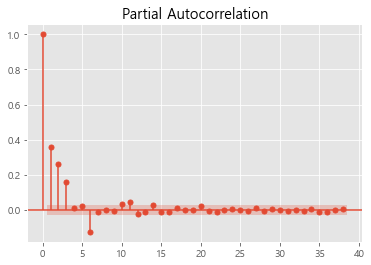

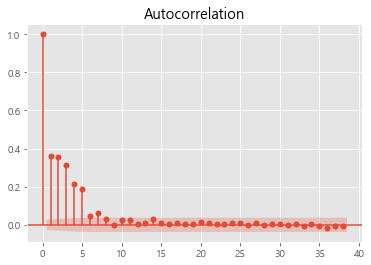

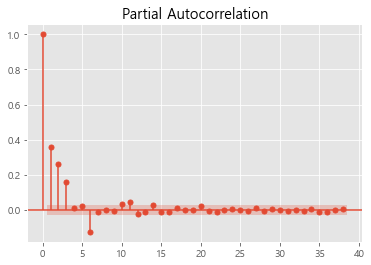

In [139]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(item_set.추정가격)
plot_pacf(item_set.추정가격)

### ACF와 PACF 모두 금방 0에 수렴하고, 5번째 lag 이후 0에 수렴한다.
### 즉, ARIMA(5,0,5) 모형을 base model로, ARIMA(5,1,1)...을 시도해볼 수 있는 것을 알 수 있다.

In [140]:
# 차분을 할 필요가 있을까?..
# 위의 ACF,PACF 그래프를 보면 비교적 빠르게 0으로 떨어지는 것을 확인할 수 있다.
# 그말은 즉슨 해당 데이터는 정상성을 띄고 있는 시계열이라고 볼 수 있을 것?
# 추세나, 계절성, 주기의 시작과 끝을 정확히 예측할 수 없는 상태

In [141]:
# sm.tsa.stattools.acf(item_set, nlags=30, fft=False)
# fig = plt.figure(figsize=(8,6))
# fig.set_facecolor('white')
# ax = fig.add_subplot()
# sm.graphics.tsa.plot_acf(item_set,lags=30, ax=ax)
# plt.title("Autocorrelation_수자원공사_용역")
# plt.show()

In [142]:
# sm.tsa.stattools.acf(item_set, nlags=30, fft=False)
# fig = plt.figure(figsize=(8,6))
# fig.set_facecolor('white')
# ax = fig.add_subplot()
# sm.graphics.tsa.plot_pacf(item_set,lags=30, ax=ax)
# plt.title("Partial Autocorrelation_수자원공사_용역")
# plt.show()

# 이것이 차분..
차분은 비정상적 시계열에서 변화를 줄여줌으로서 추세나, 계절성이 없는 정상적 시계열로 만들어주는 방법이다.

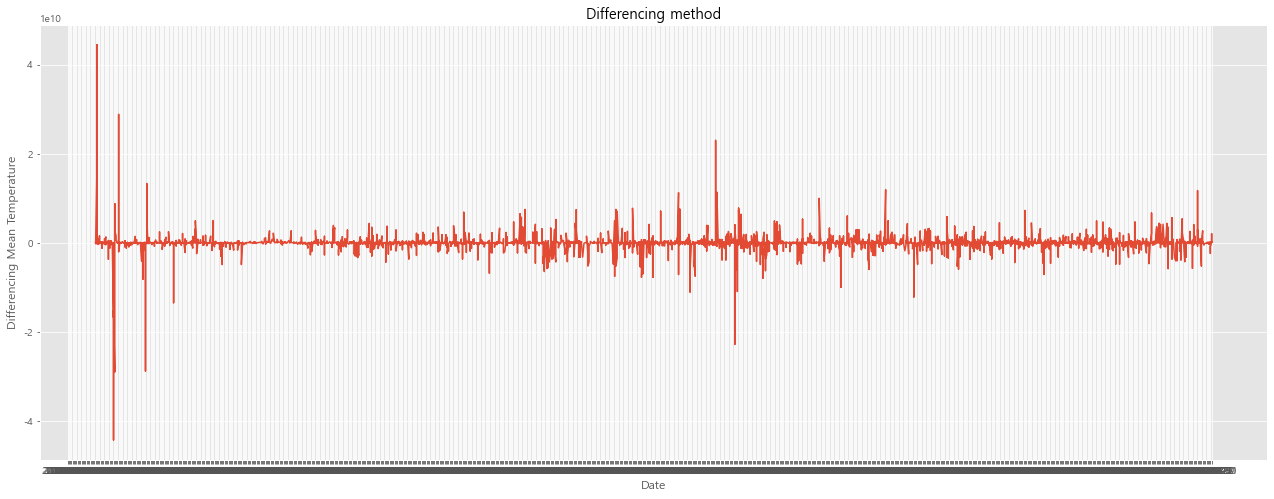

In [143]:
item_set_diff = item_set['추정가격'] - item_set['추정가격'].shift(100)
plt.figure(figsize=(22,8))
plt.plot(item_set_diff)
plt.title("Differencing method")
plt.xlabel("Date")
plt.ylabel("Differencing Mean Temperature")
plt.show()

In [144]:
list_a = np.log(item_set)
plt.figure(figsize=(22,8))
plt.plot(list_a) 
plt.show()

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(item_set['추정가격'],model='additive', freq=7)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)


# ARIMA : 시계열분석

## Python과 함께 Arima를 사용한 시계열 모델링 
https://ichi.pro/ko/python-eseo-arima-model-eul-sayonghan-ondo-yecheug-73096807304019
Pmdarima에는 특정 Python 패키지가 필요합니다


!pip install pmdarima
from pmdarima.arima import auto_arima

# 모델링해야하는 모든 시계열 데이터는 고정되어 있어야합니다. 
고정은 통계적 속성이 시간에 따라 다소 일정 함을 의미합니다. 
말이 되죠? 통계적 속성이 시간에 따라 변한다면 어떻게 예측해야합니까? 
다음은 모든 정상 모델이 가질 수있는 속성입니다.


- 상수 평균
- 상수 분산 (변형이있을 수 있지만 변동이 불규칙하지 않아야 함)
- 계절성 없음 (데이터 세트에 반복 패턴 없음)

In [1]:
plt.figure(figsize=(20,8))
item_set['추정가격'].plot(figsize=(12,5))
plt.title("수자원공사 물품 가격 변화",fontsize=20)
plt.ylabel("추정가격")
plt.show()

NameError: name 'plt' is not defined

### 일정한 평균을 갖는 것처럼 보인다는 것을 알 수 있습니다. 그리고 변동은 또한 거의 같은 것처럼 보입니다

### 데이터가 고정되어 있는지 여부를 확인하기 위해 다음 코드를 사용하여 고정 통계 테스트를 실행합니다.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:", dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
        
        
ad_test(item_set['추정가격'])

# 단위근 검정 ADF 검정(Augmented Dickey-Fuller test)
## 정상성을 확인 하는 검정
검정 가설은 다음과 같다.

H0(귀무가설):  자료에 단위근이 존재한다. 즉, 정상성을 만족하지 않는다.

H1(대립가설): 자료가 정상성을 만족한다.
### 모든 복잡한 통계에 대해 걱정할 필요가 없습니다. 
## 테스트 결과를 해석하려면 p 값만 보면됩니다. 

그리고 다음과 같은 간단한 방법을 사용합니다.

p <0.05 인 경우; 데이터가 고정되어 있습니다.

p> 0.05 인 경우; 데이터가 고정되어 있지 않습니다.

어렵고 빠른 규칙은 아니지만 고정 데이터는 작은 p 값을 가져야합니다. p 값이 클수록 특정 추세 (다양한 평균) 또는 계절성이 있음을 나타낼 수 있습니다.


# ADF 단위근 검정에서 정상성을 확인 했을 때 p-value 가 0.05 보다 작다면 차분을 시켜주지 않아도 된다. 왜냐면 이미 정상성을 만족한다고 볼 수 있기 때문이다. 

*차분: 시계열 데이터에서 변화를 없애줌으로서 평균적인 변화량을 확인 하는 방법 -> 추세, 계절성이 있는(비정상적 시계열) 시계열에서 정상성시계열로 바꾸어 주는 방법

# 마지막으로 ARIMA 모델 결정

In [ ]:
!pip install pmdarima

#### 코드는 자명합니다. auto_arima 함수에 데이터를 간단히 제공합니다. 이 기능은 기본적으로 AIC 점수라는 것을 사용하여 특정 주문 모델이 얼마나 좋은지 판단합니다. 단순히 AIC 점수를 최소화하려고 시도하며 다음과 같은 결과가 표시됩니다.

In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(item_set['추정가격'], trace=True,
suppress_warnings=True)

### 최고의 ARIMA 모델은 최소 AIC 점수가 247777.195 인 순서 (5,0,5) 인 것으로 보입니다.
### 이 정보로 우리는 마침내 예측을 시작하기 위해 모델을 훈련하고 적합화할 수 있습니다!

# 데이터 세트 분할
모델을 실제로 훈련하기 전에 데이터 세트를 훈련 및 테스트 섹션으로 분할해야합니다. 먼저 데이터에서 모델을 학습시키고 테스트 섹션을 모델에서 숨겨두기 때문에 이렇게합니다. 모델이 준비되면 테스트 데이터에 대한 예측을하고 얼마나 잘 수행되는지 확인하도록 요청합니다.

In [146]:
print(item_set.shape)
train=item_set.iloc[:-1334]
test=item_set.iloc[-1334:]
print(train.shape,test.shape)

(5223, 3)
(3889, 3) (1334, 3)


# 드디어 juicy stuff
놀랍게도 ARIMA 모델을 만드는 것은 모든 전제 조건 단계를 완료 한 후 실제로 가장 쉬운 단계 중 하나입니다. 아래 코드 스 니펫에 표시된 것처럼 간단합니다.

In [147]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(item_set['추정가격'],order=(5,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   추정가격   No. Observations:                 5223
Model:                     ARMA(5, 5)   Log Likelihood             -117126.254
Method:                       css-mle   S.D. of innovations     1326892759.962
Date:                Sun, 13 Feb 2022   AIC                         234276.507
Time:                        21:32:59   BIC                         234355.237
Sample:                             0   HQIC                        234304.040
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.119e+08   4.21e+07      9.785      0.000    3.29e+08    4.94e+08
ar.L1.추정가격    -0.3509      0.080     -4.361      0.000      -0.509      -0.193
ar.L2.추정가격     0.0044      0.084      0.052      0.958      -0.160       0.168
ar.L3.추정가격     0.3881      0.055      7.027      0.000       0.280       0.496
ar.L4.추정가격     0.0993      0.074      1.336      0.182      -0.046       0.245
ar.L5.추정가격    -0.1449      0.059     -2.455      0.014      -0.261      -0.029
ma.L1.추정가격     0.5756      0.078      7.349      0.000       0.422       0.729
ma.L2.추정가격     0.3386      0.087      3.877      0.000       0.167       0.510
ma.L3.추정가격    -0.0212      0.063     -0.338      0.735      -0.144       0.102
ma.L4.추정가격     0.1093      0.054      2.031      0.042       0.004       0.215
ma.L5.추정가격     0.3004      0.043      6.916      0.000       0.215       0.386
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5562           -1.0541j            1.1919           -0.3273
AR.2           -0.5562           +1.0541j            1.1919            0.3273
AR.3           -1.5566           -0.0000j            1.5566           -0.5000
AR.4            1.6770           -0.5558j            1.7667           -0.0509
AR.5            1.6770           +0.5558j            1.7667            0.0509
MA.1           -1.3223           -0.0000j            1.3223           -0.5000
MA.2           -0.5170           -0.9978j            1.1238           -0.3261
MA.3           -0.5170           +0.9978j            1.1238            0.3261
MA.4            0.9961           -1.0006j            1.4119           -0.1254
MA.5            0.9961           +1.0006j            1.4119            0.1254
-----------------------------------------------------------------------------
"""

여기에서 모델에 대한 많은 정보를 볼 수 있습니다. 또한 각 AR 및 MA 항의 계수를 볼 수 있습니다. 이는 이전 AR / MA 모델 방정식에서 'Some_Constant'라는 레이블이 붙은 변수의 값일뿐입니다. 일반적으로이 변수의 크기가 클수록 출력에 더 큰 영향을 미칩니다.

# 모델이 얼마나 좋은지 확인!

여기에 테스트 데이터가 들어옵니다. 먼저 테스트 데이터에서 온도를 예측합니다. 그런 다음 실제 데이터와 비교하여 예측을 확인하기 위해 플롯합니다.
훈련 데이터가 끝나는 곳에서 예측을 시작하고 싶기 때문에 시작 변수에 작성했습니다. 데이터 세트가 끝날 때 예측을 중지하려고합니다. 이는 끝 변수를 설명합니다. 미래 예측도 원한다면 시작 및 종료 변수에서 원하는 인덱스로 변경하면됩니다. 출력 플롯은 다음과 같아야합니다.

<AxesSubplot:xlabel='공고게시일자'>

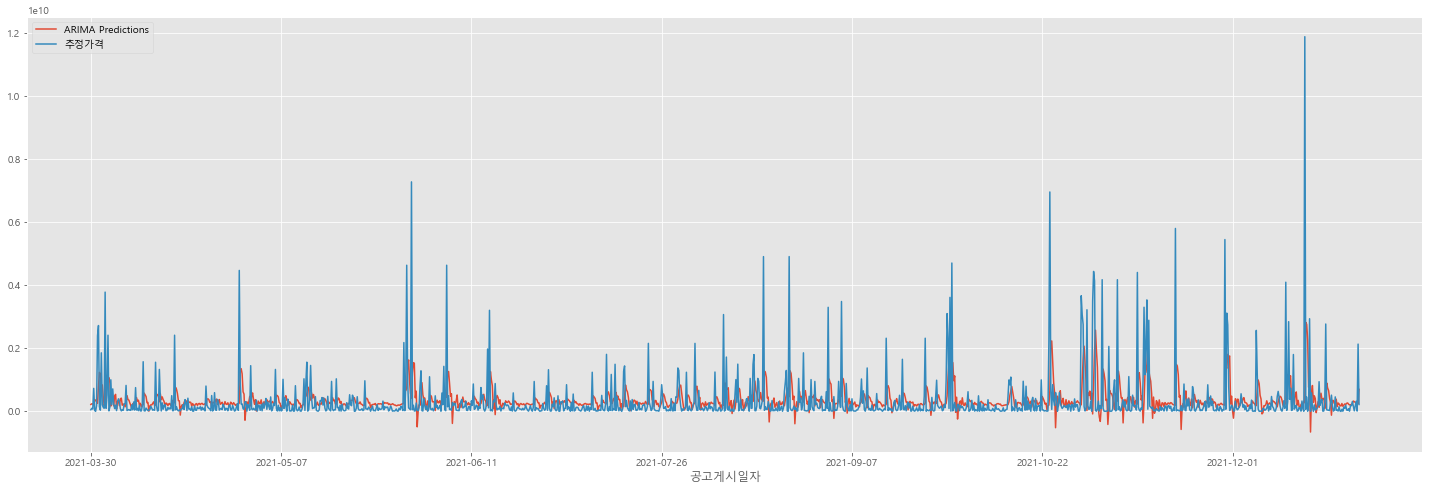

In [148]:
start=len(train)
end=len(train)+len(test)-1
plt.figure(figsize=(25,8))
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['추정가격'].plot(legend=True)

<AxesSubplot:xlabel='공고게시일자'>

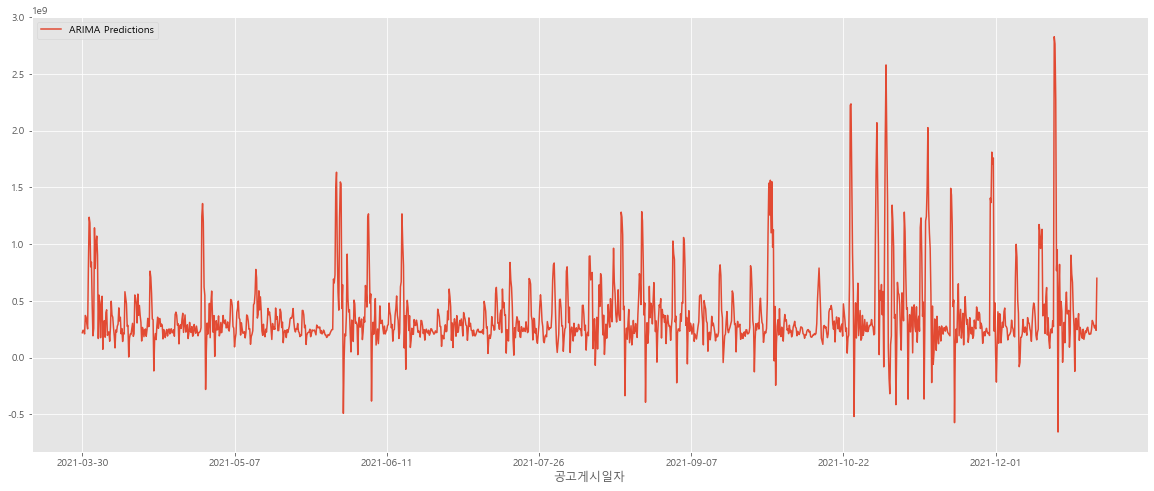

In [149]:
plt.figure(figsize=(20,8))
pred.plot(legend=True)

# 정확도 메트릭 확인
모델이 얼마나 좋은지 또는 나쁜지 실제로 확인하기 위해 제곱 평균 오차를 찾습니다. 다음 코드 스 니펫은 다음을 보여줍니다.

In [150]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['추정가격'].mean()
rmse=sqrt(mean_squared_error(pred,test['추정가격']))
print(rmse)

831692627.5611925


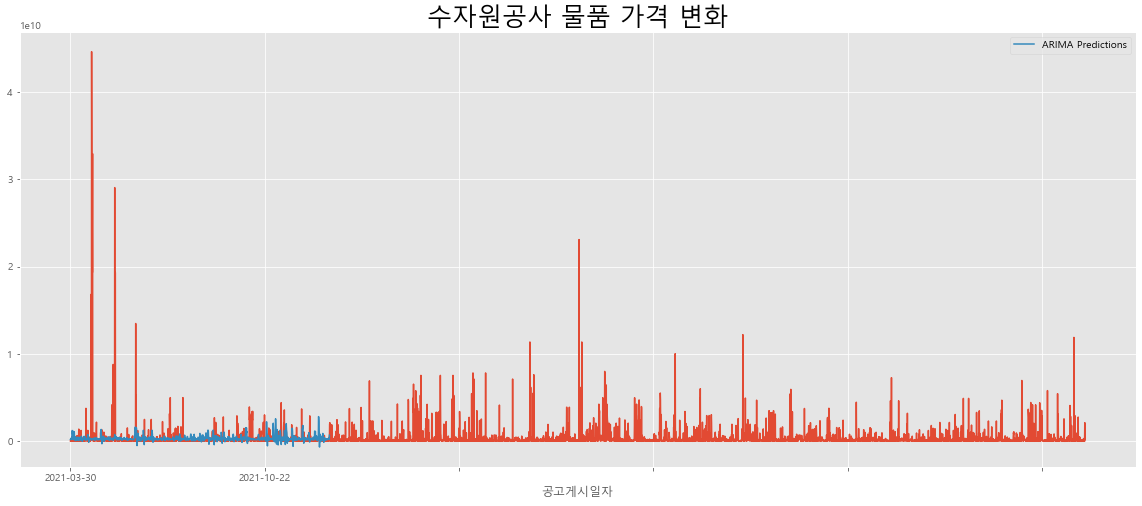

In [151]:
plt.figure(figsize=(20,8))
item_set['추정가격'].plot(figsize=(20,8))
plt.title("수자원공사 물품 가격 변화",fontsize=25)
pred.plot(legend=True)
plt.show()
#plt.text(,"2018-08-14",)

In [107]:
 # 문제는.... 잔차가 조옴.. 잔차를 줄이기 위해서 어떻게 해야하는지 알아보고 다시 모델피팅을해보자